-Initializing tensors , doing mathematical operations incl matrix operations
-Conversion from numpy to pytorch tensor and viceversa

In [2]:
import torch
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
# Create an input tensor

x=torch.tensor([[1, 0,1,0],[1,0,1,1],[0,1,0,1]],dtype=torch.float)

print('\n Input Tensor:')
print(x)

print('\n Shape of Input Tensor:', x.shape)
# 4 features and 3 samples


 Input Tensor:
tensor([[1., 0., 1., 0.],
        [1., 0., 1., 1.],
        [0., 1., 0., 1.]])

 Shape of Input Tensor: torch.Size([3, 4])


In [4]:
# Convert the input in matrix form - by transposing the tensor - so that features are in rows and samples are in columns

X=x.t()
print('\n Input in matrix form:')
print(X)
print('\n Shape of Input in matrix form:', X.shape)


 Input in matrix form:
tensor([[1., 1., 0.],
        [0., 0., 1.],
        [1., 1., 0.],
        [0., 1., 1.]])

 Shape of Input in matrix form: torch.Size([4, 3])


In [5]:
y=torch.tensor([[1],[1],[0]],dtype=torch.float)
print('\n Actual Output:')
print(y)
print('\n Shape of Actual Output:', y.shape)

y=y.t()
print('\n Converted Output:')
print(y)
print('\n Shape of Converted Output:', y.shape)


 Actual Output:
tensor([[1.],
        [1.],
        [0.]])

 Shape of Actual Output: torch.Size([3, 1])

 Converted Output:
tensor([[1., 1., 0.]])

 Shape of Converted Output: torch.Size([1, 3])


Neural Nets


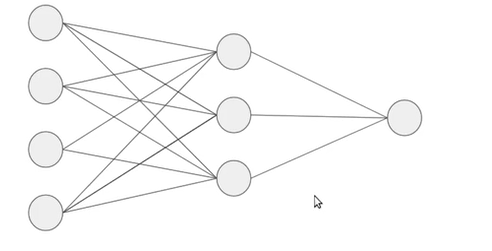

In [6]:
inputlayer_neurons=X.shape[0] # number of features
hiddenlayer_neurons=3 # number of hidden neurons
output_neurons=y.shape[0] # number of output neurons


In [7]:
# Define the weights 


# Weights between input and hidden layer will be of shape (inputlayer_neurons, hiddenlayer_neurons) i.e. (4,3)
w_ih=torch.randn(inputlayer_neurons, hiddenlayer_neurons)

# Weights for the hidden-output layer will be of shape (hiddenlayer_neurons, output_neurons) i.e. (3,1)
w_ho=torch.randn(hiddenlayer_neurons, output_neurons)
# Assuming bias is 0 for simplicity


Implementing Forward propogation

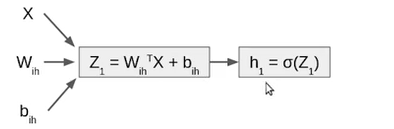

In [8]:
def sigmoid(s):
    return 1/(1+torch.exp(-s))

In [9]:
# hidden layer activations

hidden_layer_input=torch.matmul(w_ih.t(),X)
hidden_layer_activation=sigmoid(hidden_layer_input)

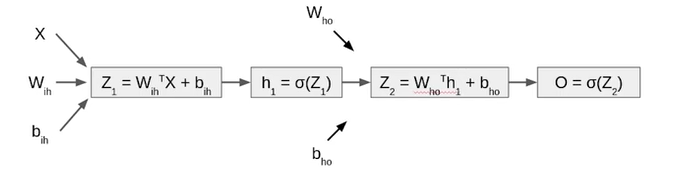

In [10]:
output_layer_input=torch.matmul(w_ho.t(),hidden_layer_activation)
output=sigmoid(output_layer_input)
output

tensor([[0.5476, 0.4886, 0.5283]])

Implement backward propogation

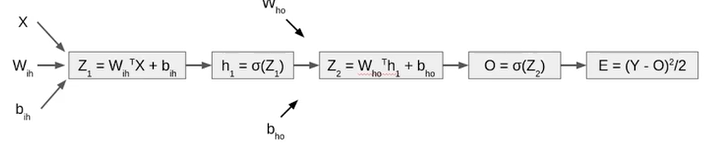

In [11]:
error =torch.pow((output-y),2)

Rate of change of error wrt w_ho and w_ih

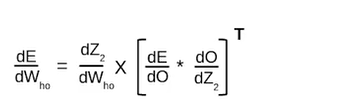

In [12]:
error_wrt_output=-(y-output)
output_wrt_Z2=torch.mul(output,(1-output))
z2_wrt_who=hidden_layer_activation
errot_wrt_who=torch.matmul(z2_wrt_who, (error_wrt_output*output_wrt_Z2).t())

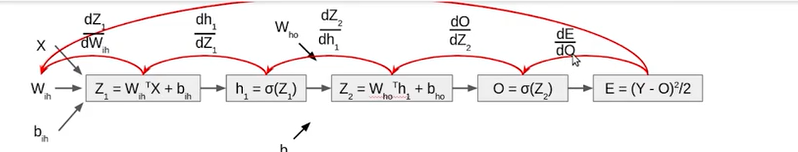

In [13]:
error_wrt_output = -(y-output)

# rate of change of output w.r.t. Z2
output_wrt_Z2 = torch.mul(output,(1-output))

# rate of change of Z2 w.r.t. hidden layer activations
Z2_wrt_h1 = w_ho

# rate of change of hidden layer activations w.r.t. Z1
h1_wrt_Z1 = torch.mul(hidden_layer_activation,(1-hidden_layer_activation))

# rate of change of Z1 w.r.t. weights between input and hidden layer
Z1_wrt_wih = X

In [14]:

t2=torch.matmul(Z1_wrt_wih, h1_wrt_Z1)

In [15]:
t1=torch.matmul(Z2_wrt_h1, (error_wrt_output*output_wrt_Z2))

In [16]:
torch.matmul(t1, t2.t())

tensor([[-0.0173, -0.0078, -0.0173, -0.0169],
        [-0.0369, -0.0167, -0.0369, -0.0360],
        [ 0.0494,  0.0224,  0.0494,  0.0482]])

In [17]:
error_wrt_wih=torch.matmul(torch.matmul(Z1_wrt_wih, h1_wrt_Z1), torch.matmul(Z2_wrt_h1, (error_wrt_output*output_wrt_Z2)))

Update the parameters
w=w-lr*dE(w)/d(w)

In [18]:
lr=0.01

In [19]:
w_ho=w_ho-lr*errot_wrt_who
w_ih=w_ih-lr*error_wrt_wih


Now training for n epochs 


In [34]:
epochs=10000
error_epoch = []
for i in range(epochs):
    # hidden layer activations
    hidden_layer_input = torch.matmul(w_ih.t(), X)
    hidden_layer_activation = sigmoid(hidden_layer_input)

    # output layer activations
    output_layer_input = torch.matmul(w_ho.t(), hidden_layer_activation)
    output = sigmoid(output_layer_input)

    # calculate error
    error = torch.pow((output - y), 2)
    error_epoch.append(torch.mean(error))
    # backpropagation
    error_wrt_output = -(y - output)
    output_wrt_Z2 = torch.mul(output, (1 - output))
    z2_wrt_who = hidden_layer_activation
    error_wrt_who = torch.matmul(z2_wrt_who, (error_wrt_output * output_wrt_Z2).t())

    error_wrt_output = -(y - output)

    # rate of change of output w.r.t. Z2
    output_wrt_Z2 = torch.mul(output, (1 - output))

    # rate of change of Z2 w.r.t. hidden layer activations
    Z2_wrt_h1 = w_ho

    # rate of change of hidden layer activations w.r.t. Z1
    h1_wrt_Z1 = torch.mul(hidden_layer_activation, (1 - hidden_layer_activation))

    # rate of change of Z1 w.r.t. weights between input and hidden layer
    Z1_wrt_wih = X

    error_wrt_wih = torch.matmul(torch.matmul(Z1_wrt_wih, h1_wrt_Z1), torch.matmul(Z2_wrt_h1, (error_wrt_output * output_wrt_Z2)))

    # update weights
    w_ho = w_ho - lr * error_wrt_who
    w_ih = w_ih - lr * error_wrt_wih


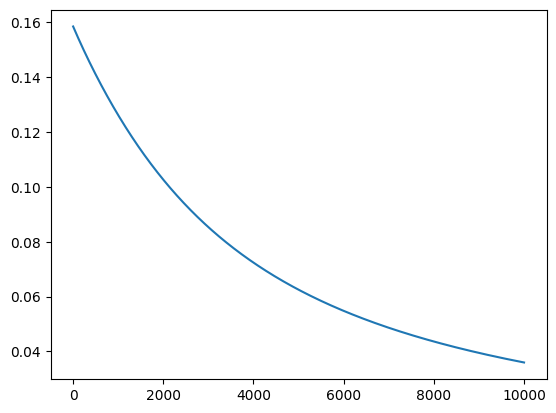

In [35]:
plt.plot(torch.arange(1,epochs+1),torch.Tensor(error_epoch).numpy())